Player movement heatmap for epl top scorer

In [1]:
import json
import pandas as pd
import numpy as np
from copy import deepcopy
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [2]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

In [3]:
# Setting boundaries and midpoint:
x_lims = [0, 1.15]
y_lims = [0, 0.74]

x_mid = x_lims[1]/2
y_mid = y_lims[1]/2

# Setting color and linewidth:
background_color = "green"
line_color = "white"
line_width = 2.

(-0.057499999999999996, 1.2075, -0.037, 0.777)

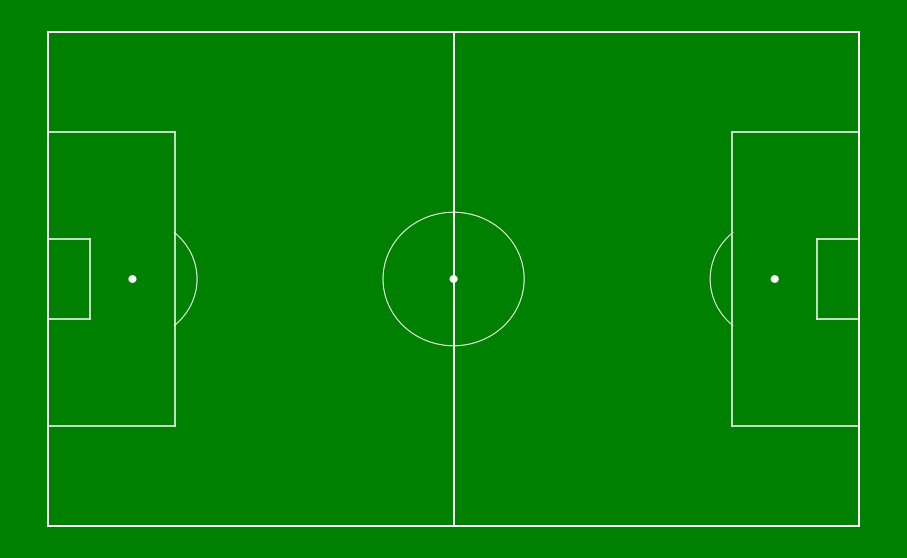

In [4]:
# Create figure:
fig = plt.figure(facecolor=background_color, figsize=(16, 10))
ax = fig.add_subplot(111, facecolor=background_color)

# Pitch Outline & Centre Line
plt.plot([x_lims[0], x_lims[0]], [y_lims[0], y_lims[1]], linewidth=line_width, color=line_color)  # left goal-line
plt.plot([x_lims[0], x_lims[1]], [y_lims[1], y_lims[1]], linewidth=line_width, color=line_color)  # Upper side-line
plt.plot([x_lims[1], x_lims[1]], [y_lims[1], y_lims[0]], linewidth=line_width, color=line_color)  # Right goal-line
plt.plot([x_lims[1], x_lims[0]], [y_lims[0], y_lims[0]], linewidth=line_width, color=line_color)  # Lower side-line
plt.plot([x_mid, x_mid], [y_lims[0], y_lims[1]], linewidth=line_width, color=line_color)  # Center line
# Left Penalty Area
plt.plot([x_lims[0]+.18, x_lims[0]+.18], [y_mid - .22, y_mid + .22], color=line_color)
plt.plot([x_lims[0], x_lims[0]+.18], [y_mid + .22, y_mid + .22], color=line_color)
plt.plot([x_lims[0], x_lims[0]+.18], [y_mid - .22, y_mid - .22], color=line_color)

# Right Penalty Area
plt.plot([x_lims[1] - .18, x_lims[1] - .18], [y_mid - .22, y_mid + .22], color=line_color)
plt.plot([x_lims[1], x_lims[1] - .18], [y_mid + .22, y_mid + .22], color=line_color)
plt.plot([x_lims[1], x_lims[1] - .18], [y_mid - .22, y_mid - .22], color=line_color)
 # Left 6yd box Area
plt.plot([x_lims[0]+.06, x_lims[0]+.06], [y_mid - .06, y_mid + .06], color=line_color)
plt.plot([x_lims[0], x_lims[0]+.06], [y_mid + .06, y_mid + .06], color=line_color)
plt.plot([x_lims[0], x_lims[0]+.06], [y_mid - .06, y_mid - .06], color=line_color)

# # Right 6yd box Area
plt.plot([x_lims[1] - .06, x_lims[1] - .06], [y_mid - .06, y_mid + .06], color=line_color)
plt.plot([x_lims[1], x_lims[1] - .06], [y_mid + .06, y_mid + .06], color=line_color)
plt.plot([x_lims[1], x_lims[1] - .06], [y_mid - .06, y_mid - .06], color=line_color)

# Prepare Circles
centre_circle = plt.Circle((x_mid, y_mid), .1, color=line_color, fill=False)
centre_spot = plt.Circle((x_mid, y_mid), 0.005, color=line_color)
left_pen_spot = plt.Circle((x_lims[0]+0.12, y_mid), 0.005, color=line_color)
right_pen_spot = plt.Circle((x_lims[1] - 0.12, y_mid), 0.005, color=line_color)

# Draw Circles
ax.add_patch(centre_circle)
ax.add_patch(centre_spot)
ax.add_patch(left_pen_spot)
ax.add_patch(right_pen_spot)

# Prepare Arcs
left_arc = Arc((x_lims[0] + .12, y_mid), height=.183, width=.183, angle=0, theta1=310, theta2=50, color=line_color)
right_arc = Arc((x_lims[1] - .12, y_mid), height=.183, width=.183, angle=0, theta1=130, theta2=230, color=line_color)

# Draw Arcs
ax.add_patch(left_arc)
ax.add_patch(right_arc)

plt.axis("off")

## Scrapping the data from Understat website

In [5]:
scrape_url = "https://understat.com/player/8260"
page_connect = urlopen(scrape_url)
page_html = BeautifulSoup(page_connect,"html.parser")

In [6]:
page_html.findAll(name="script")[3].text

"\n\tvar shotsData \t= JSON.parse('\\x5B\\x7B\\x22id\\x22\\x3A\\x22354876\\x22,\\x22minute\\x22\\x3A\\x2258\\x22,\\x22result\\x22\\x3A\\x22Goal\\x22,\\x22X\\x22\\x3A\\x220.8880000305175781\\x22,\\x22Y\\x22\\x3A\\x220.6659999847412109\\x22,\\x22xG\\x22\\x3A\\x220.07933320105075836\\x22,\\x22player\\x22\\x3A\\x22Erling\\x20Haaland\\x22,\\x22h_a\\x22\\x3A\\x22a\\x22,\\x22player_id\\x22\\x3A\\x228260\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222019\\x22,\\x22shotType\\x22\\x3A\\x22LeftFoot\\x22,\\x22match_id\\x22\\x3A\\x2212562\\x22,\\x22h_team\\x22\\x3A\\x22Augsburg\\x22,\\x22a_team\\x22\\x3A\\x22Borussia\\x20Dortmund\\x22,\\x22h_goals\\x22\\x3A\\x223\\x22,\\x22a_goals\\x22\\x3A\\x225\\x22,\\x22date\\x22\\x3A\\x222020\\x2D01\\x2D18\\x2014\\x3A30\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Jadon\\x20Sancho\\x22,\\x22lastAction\\x22\\x3A\\x22Throughball\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22354881\\x22,\\x22minute\\x22\\x3A\\x2269\\x22,\\x22result\\x22\\x3A\\

In [7]:
json_raw_string = page_html.findAll(name="script")[3].text

In [8]:
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

In [9]:
json_data = json_raw_string[start_ind:stop_ind]
json_data

'\\x5B\\x7B\\x22id\\x22\\x3A\\x22354876\\x22,\\x22minute\\x22\\x3A\\x2258\\x22,\\x22result\\x22\\x3A\\x22Goal\\x22,\\x22X\\x22\\x3A\\x220.8880000305175781\\x22,\\x22Y\\x22\\x3A\\x220.6659999847412109\\x22,\\x22xG\\x22\\x3A\\x220.07933320105075836\\x22,\\x22player\\x22\\x3A\\x22Erling\\x20Haaland\\x22,\\x22h_a\\x22\\x3A\\x22a\\x22,\\x22player_id\\x22\\x3A\\x228260\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222019\\x22,\\x22shotType\\x22\\x3A\\x22LeftFoot\\x22,\\x22match_id\\x22\\x3A\\x2212562\\x22,\\x22h_team\\x22\\x3A\\x22Augsburg\\x22,\\x22a_team\\x22\\x3A\\x22Borussia\\x20Dortmund\\x22,\\x22h_goals\\x22\\x3A\\x223\\x22,\\x22a_goals\\x22\\x3A\\x225\\x22,\\x22date\\x22\\x3A\\x222020\\x2D01\\x2D18\\x2014\\x3A30\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Jadon\\x20Sancho\\x22,\\x22lastAction\\x22\\x3A\\x22Throughball\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22354881\\x22,\\x22minute\\x22\\x3A\\x2269\\x22,\\x22result\\x22\\x3A\\x22Goal\\x22,\\x22X\\x22\\x3A\\x22

In [10]:
json_data = json_data.encode("utf8").decode("unicode_escape")

In [11]:
shots_df = pd.json_normalize(json.loads(json_data))

In [12]:
shots_df.columns

Index(['id', 'minute', 'result', 'X', 'Y', 'xG', 'player', 'h_a', 'player_id',
       'situation', 'season', 'shotType', 'match_id', 'h_team', 'a_team',
       'h_goals', 'a_goals', 'date', 'player_assisted', 'lastAction'],
      dtype='object')

In [13]:
shots_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               238 non-null    object
 1   minute           238 non-null    object
 2   result           238 non-null    object
 3   X                238 non-null    object
 4   Y                238 non-null    object
 5   xG               238 non-null    object
 6   player           238 non-null    object
 7   h_a              238 non-null    object
 8   player_id        238 non-null    object
 9   situation        238 non-null    object
 10  season           238 non-null    object
 11  shotType         238 non-null    object
 12  match_id         238 non-null    object
 13  h_team           238 non-null    object
 14  a_team           238 non-null    object
 15  h_goals          238 non-null    object
 16  a_goals          238 non-null    object
 17  date             238 non-null    ob

In [14]:
shots_df.apply(pd.to_numeric,errors="ignore").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               238 non-null    int64  
 1   minute           238 non-null    int64  
 2   result           238 non-null    object 
 3   X                238 non-null    float64
 4   Y                238 non-null    float64
 5   xG               238 non-null    float64
 6   player           238 non-null    object 
 7   h_a              238 non-null    object 
 8   player_id        238 non-null    int64  
 9   situation        238 non-null    object 
 10  season           238 non-null    int64  
 11  shotType         238 non-null    object 
 12  match_id         238 non-null    int64  
 13  h_team           238 non-null    object 
 14  a_team           238 non-null    object 
 15  h_goals          238 non-null    int64  
 16  a_goals          238 non-null    int64  
 17  date            

In [15]:
shots_df.shape

(238, 20)

In [17]:
shots_df.apply(pd.to_numeric,errors="ignore").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               238 non-null    int64  
 1   minute           238 non-null    int64  
 2   result           238 non-null    object 
 3   X                238 non-null    float64
 4   Y                238 non-null    float64
 5   xG               238 non-null    float64
 6   player           238 non-null    object 
 7   h_a              238 non-null    object 
 8   player_id        238 non-null    int64  
 9   situation        238 non-null    object 
 10  season           238 non-null    int64  
 11  shotType         238 non-null    object 
 12  match_id         238 non-null    int64  
 13  h_team           238 non-null    object 
 14  a_team           238 non-null    object 
 15  h_goals          238 non-null    int64  
 16  a_goals          238 non-null    int64  
 17  date            

In [18]:
shots_df=shots_df.apply(pd.to_numeric,errors="ignore")

In [19]:
shots_df.describe().round(1)

,id,minute,X,Y,xG,player_id,season,match_id,h_goals,a_goals
count,238.0,238.0,238.0,238.0,238.0,238.0,238.0,238.0,238.0,238.0
mean,422552.7,49.8,0.9,0.5,0.2,8260.0,2020.5,16097.0,2.5,1.7
std,40621.3,26.3,0.0,0.1,0.2,0.0,0.9,1866.1,1.7,1.3
min,354876.0,0.0,0.8,0.3,0.0,8260.0,2019.0,12562.0,0.0,0.0
25%,387858.2,27.0,0.9,0.5,0.1,8260.0,2020.0,15209.8,1.0,1.0
50%,417182.5,53.0,0.9,0.5,0.1,8260.0,2020.0,15413.0,2.0,2.0
75%,452982.5,72.8,0.9,0.6,0.4,8260.0,2021.0,17686.0,4.0,3.0
max,490656.0,94.0,1.0,0.8,1.0,8260.0,2022.0,18289.0,6.0,5.0


In [20]:
shots_df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,354876,58,Goal,0.888,0.666,0.079333,Erling Haaland,a,8260,OpenPlay,2019,LeftFoot,12562,Augsburg,Borussia Dortmund,3,5,2020-01-18 14:30:00,Jadon Sancho,Throughball
1,354881,69,Goal,0.980,0.489,0.920621,Erling Haaland,a,8260,OpenPlay,2019,LeftFoot,12562,Augsburg,Borussia Dortmund,3,5,2020-01-18 14:30:00,Thorgan Hazard,Pass
2,354883,78,Goal,0.883,0.347,0.322831,Erling Haaland,a,8260,OpenPlay,2019,LeftFoot,12562,Augsburg,Borussia Dortmund,3,5,2020-01-18 14:30:00,Marco Reus,Throughball
3,355527,65,BlockedShot,0.886,0.639,0.119181,Erling Haaland,h,8260,OpenPlay,2019,LeftFoot,12566,Borussia Dortmund,FC Cologne,5,1,2020-01-24 19:30:00,Jadon Sancho,Pass
4,355531,76,Goal,0.955,0.495,0.746641,Erling Haaland,h,8260,OpenPlay,2019,LeftFoot,12566,Borussia Dortmund,FC Cologne,5,1,2020-01-24 19:30:00,None,Rebound


(0.6409045413059884,
 1.0500955197291677,
 0.11629502613827397,
 0.903704973861726)

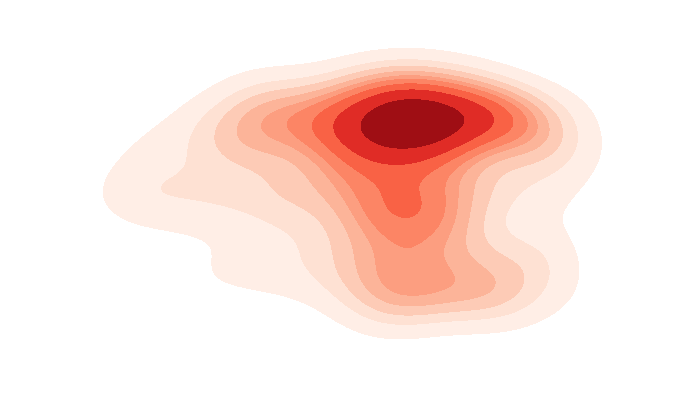

In [77]:
plt.figure(figsize=(12,7))
sns.kdeplot(x=shots_df["X"],y=shots_df["Y"],shade=True,n_levels=10,cmap="Reds")
plt.axis("off")

In [54]:
x_lims = [0, 1.15]
y_lims = [0, 0.74]

x_mid = x_lims[1]/2
y_mid = y_lims[1]/2

# Setting color and linewidth:
background_color = "green"
line_color = "white"
line_width = 2.

In [55]:
full_pitch_shots_df = deepcopy(shots_df)

In [56]:
full_pitch_shots_df["X"] = full_pitch_shots_df["X"].multiply(x_lims[1])
full_pitch_shots_df["Y"] = full_pitch_shots_df["Y"].multiply(y_lims[1])

In [59]:
def create_full_pitch(x_lims, y_lims, background_color="green", line_color="white", line_width=2.):
    """
    Function to create a full-scale pitch based on input dimensions
    :params:
    x_lims: min and max limits for the length of the field
    y_lims: min and max limits for the width/breadth of the field
    background_color: Background color of the field
    line_color: Color for all the lines in the field (Keep this color in contrast with background_color for optimal visual results)
    line_width: The thickness of the outer and center lines
    """
    # Create figure:
    fig = plt.figure(facecolor=background_color, figsize=(12, 7))
    ax = fig.add_subplot(111, facecolor=background_color)

    # Pitch Outline & Centre Line
    plt.plot([x_lims[0], x_lims[0]], [y_lims[0], y_lims[1]], linewidth=line_width, color=line_color)  # left goal-line
    plt.plot([x_lims[0], x_lims[1]], [y_lims[1], y_lims[1]], linewidth=line_width, color=line_color)  # Upper side-line
    plt.plot([x_lims[1], x_lims[1]], [y_lims[1], y_lims[0]], linewidth=line_width, color=line_color)  # Right goal-line
    plt.plot([x_lims[1], x_lims[0]], [y_lims[0], y_lims[0]], linewidth=line_width, color=line_color)  # Lower side-line
    plt.plot([x_mid, x_mid], [y_lims[0], y_lims[1]], linewidth=line_width, color=line_color)  # Center line

    # Left Penalty Area
    plt.plot([x_lims[0]+.18, x_lims[0]+.18], [y_mid - .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.18], [y_mid + .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.18], [y_mid - .22, y_mid - .22], color=line_color)

    # Right Penalty Area
    plt.plot([x_lims[1] - .18, x_lims[1] - .18], [y_mid - .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .18], [y_mid + .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .18], [y_mid - .22, y_mid - .22], color=line_color)

    # Left 6yd box Area
    plt.plot([x_lims[0]+.06, x_lims[0]+.06], [y_mid - .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.06], [y_mid + .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.06], [y_mid - .06, y_mid - .06], color=line_color)

    # # Right 6yd box Area
    plt.plot([x_lims[1] - .06, x_lims[1] - .06], [y_mid - .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .06], [y_mid + .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .06], [y_mid - .06, y_mid - .06], color=line_color)

    # Prepare Circles
    centre_circle = plt.Circle((x_mid, y_mid), .1, color=line_color, fill=False)
    centre_spot = plt.Circle((x_mid, y_mid), 0.005, color=line_color)
    left_pen_spot = plt.Circle((x_lims[0]+0.12, y_mid), 0.005, color=line_color)
    right_pen_spot = plt.Circle((x_lims[1] - 0.12, y_mid), 0.005, color=line_color)

    # Draw Circles
    ax.add_patch(centre_circle)
    ax.add_patch(centre_spot)
    ax.add_patch(left_pen_spot)
    ax.add_patch(right_pen_spot)

    # Prepare Arcs
    left_arc = Arc((x_lims[0] + .12, y_mid), height=.183, width=.183, angle=0, theta1=310, theta2=50, color=line_color)
    right_arc = Arc((x_lims[1] - .12, y_mid), height=.183, width=.183, angle=0, theta1=130, theta2=230, color=line_color)

    # Draw Arcs
    ax.add_patch(left_arc)
    ax.add_patch(right_arc)

    plt.axis("off")

(0.0, 0.74)

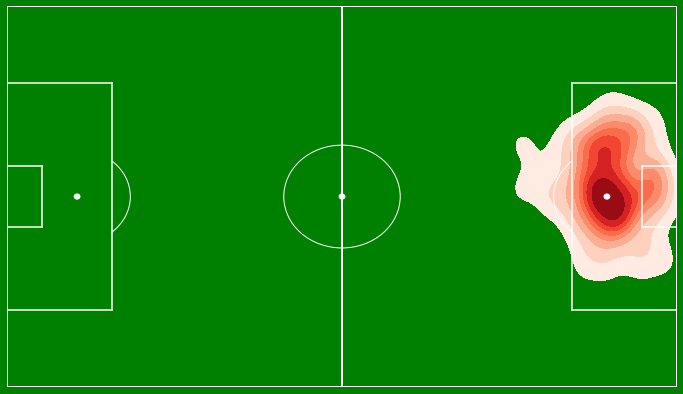

In [61]:
create_full_pitch(x_lims,y_lims)
ax=sns.kdeplot(x=full_pitch_shots_df["X"],y=full_pitch_shots_df["Y"],shade=True,n_levels=10,cmap="Reds")
plt.xlim(x_lims)
plt.ylim(y_lims)

Player heatmaps for top 10 epl scorers

In [68]:
scrape_url = "https://understat.com/league/EPL"
page_connect = urlopen(scrape_url)
page_html = BeautifulSoup(page_connect, "html.parser")

json_raw_string = page_html.findAll(name="script")[3].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")
json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

shots_df = pd.json_normalize(json.loads(json_data))
shots_df = shots_df.apply(pd.to_numeric, errors="ignore")
final_json_df = pd.json_normalize(json.loads(json_data)).head(10)
player_id_list = final_json_df["id"].to_list()
print(player_id_list)

['8260', '647', '773', '482', '998', '5543', '6055', '6818', '7698', '522']


In [70]:
player_shot_df_list = []
for p_id in player_id_list:
    # Scrape player stats:
    scrape_url = "https://understat.com/player/{}".format(p_id)
    page_connect = urlopen(scrape_url)
    page_html = BeautifulSoup(page_connect, "html.parser")

    json_raw_string = page_html.findAll(name="script")[3].text
    start_ind = json_raw_string.index("\\")
    stop_ind = json_raw_string.index("')")

    json_data = json_raw_string[start_ind:stop_ind]
    json_data = json_data.encode("utf8").decode("unicode_escape")

    shots_df = pd.json_normalize(json.loads(json_data))
    shots_df = shots_df.apply(pd.to_numeric, errors="ignore")

    full_pitch_shots_df = deepcopy(shots_df)
    full_pitch_shots_df["X"] = full_pitch_shots_df["X"].multiply(x_lims[1])
    full_pitch_shots_df["Y"] = full_pitch_shots_df["Y"].multiply(y_lims[1])
    player_shot_df_list.append(full_pitch_shots_df)

In [71]:
player_shot_df_list[3].head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,24415,5,BlockedShot,0.84410,0.34780,0.015001,Roberto Firmino,h,482,OpenPlay,2014,RightFoot,5448,Hoffenheim,Augsburg,2,0,2014-08-23 14:30:00,None,None
1,24419,29,MissedShots,0.93725,0.41218,0.045820,Roberto Firmino,h,482,OpenPlay,2014,RightFoot,5448,Hoffenheim,Augsburg,2,0,2014-08-23 14:30:00,Niklas Süle,Pass
2,24421,32,SavedShot,1.10745,0.50690,0.059303,Roberto Firmino,h,482,OpenPlay,2014,LeftFoot,5448,Hoffenheim,Augsburg,2,0,2014-08-23 14:30:00,Ádám Szalai,Pass
3,24686,9,BlockedShot,0.89815,0.27454,0.028346,Roberto Firmino,a,482,OpenPlay,2014,LeftFoot,5457,Werder Bremen,Hoffenheim,1,1,2014-08-30 14:30:00,Sebastian Rudy,Pass
4,24689,11,MissedShots,1.09135,0.44992,0.016434,Roberto Firmino,a,482,FromCorner,2014,Head,5457,Werder Bremen,Hoffenheim,1,1,2014-08-30 14:30:00,Sebastian Rudy,Aerial


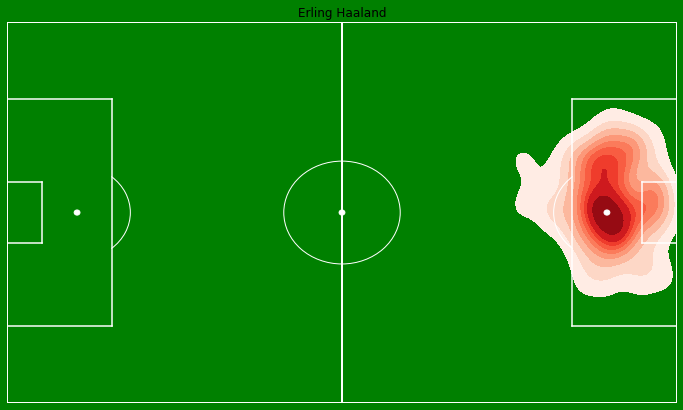

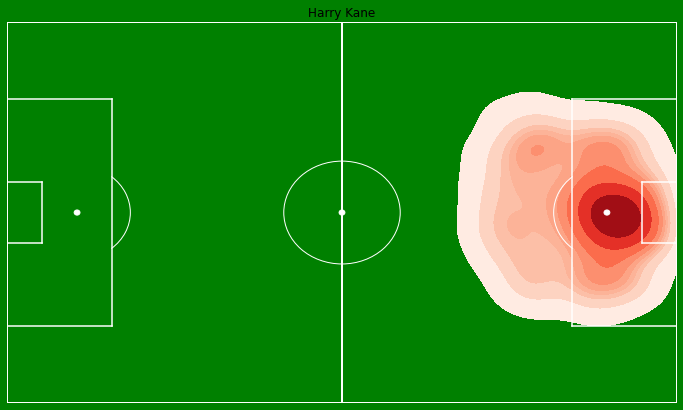

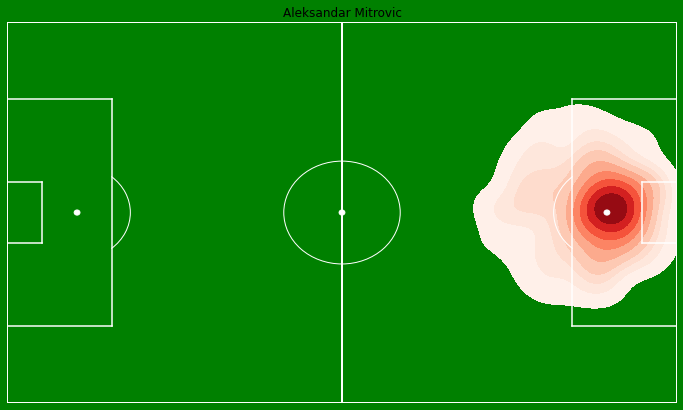

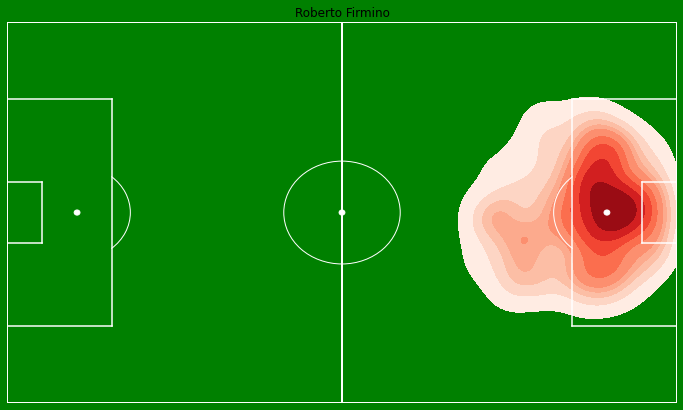

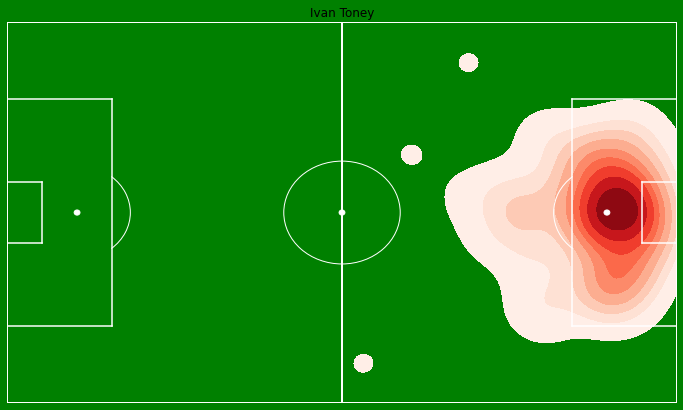

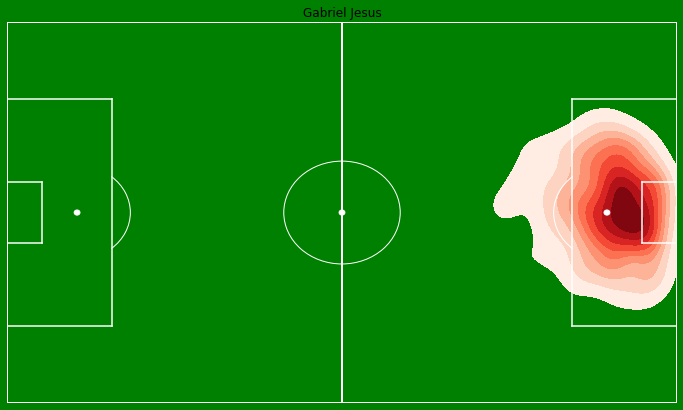

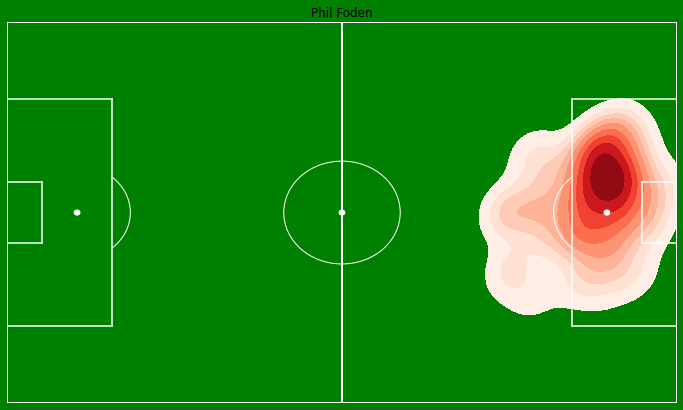

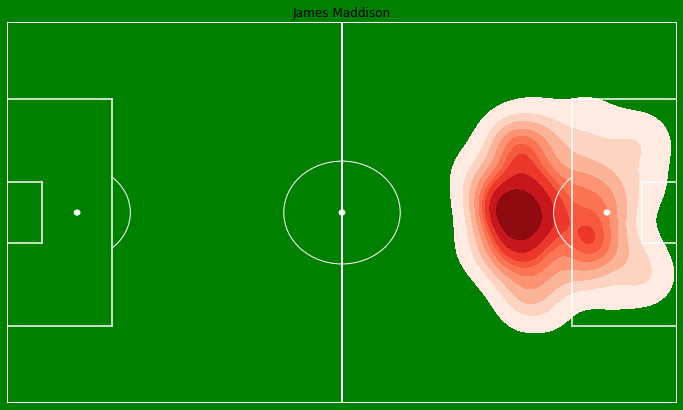

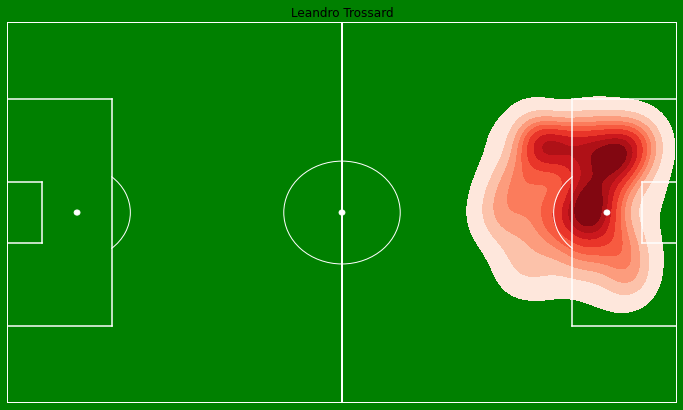

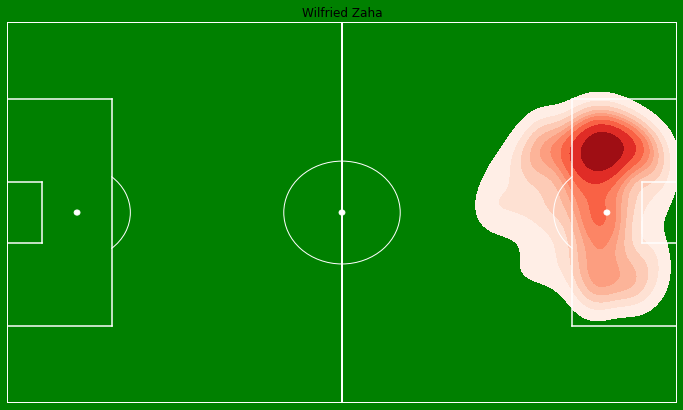

In [73]:
for p_df in player_shot_df_list:
    # Generate image of field:
    create_full_pitch(x_lims, y_lims)

    # Plot the heat-map:
    ax = sns.kdeplot(x=p_df["X"], y=p_df["Y"], shade=True, n_levels=10,cmap="Reds")
    # Set axis tick limits:
    plt.xlim(x_lims)
    plt.ylim(y_lims)
    plt.title(p_df["player"].unique().item())
    plt.show()

In [ ]:
|